# PRML Course Project

# Project Title: Heart Failure Prediction

# Group Members-->
# Rishabh Jain (B20EE083),
#                 Saurav Kumar (B20EE081),
#                 Sarthak Ratnakar Deore (B20EE058)

In [ ]:
#import libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, \
multilabel_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
data = pd.read_csv('/content/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Encoding Categorical Features

In [ ]:
def encodeCategoricalFeatures(df):
  categorical_features = df[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']]
  non_categorical_features = df.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1)

  encoder = preprocessing.OrdinalEncoder().fit(categorical_features)
  categorical_features = pd.DataFrame(encoder.fit_transform(categorical_features),columns=categorical_features.columns,index=categorical_features.index)
  
  df = pd.concat([non_categorical_features,categorical_features], axis=1, join="inner")

  return df

data_encoded = encodeCategoricalFeatures(data)
data_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40,140,289,0,172,0.0,0,1.0,1.0,1.0,0.0,2.0
1,49,160,180,0,156,1.0,1,0.0,2.0,1.0,0.0,1.0
2,37,130,283,0,98,0.0,0,1.0,1.0,2.0,0.0,2.0
3,48,138,214,0,108,1.5,1,0.0,0.0,1.0,1.0,1.0
4,54,150,195,0,122,0.0,0,1.0,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1.0,3.0,1.0,0.0,1.0
914,68,144,193,1,141,3.4,1,1.0,0.0,1.0,0.0,1.0
915,57,130,131,0,115,1.2,1,1.0,0.0,1.0,1.0,1.0
916,57,130,236,0,174,0.0,1,0.0,1.0,0.0,0.0,1.0


In [ ]:
#visualization

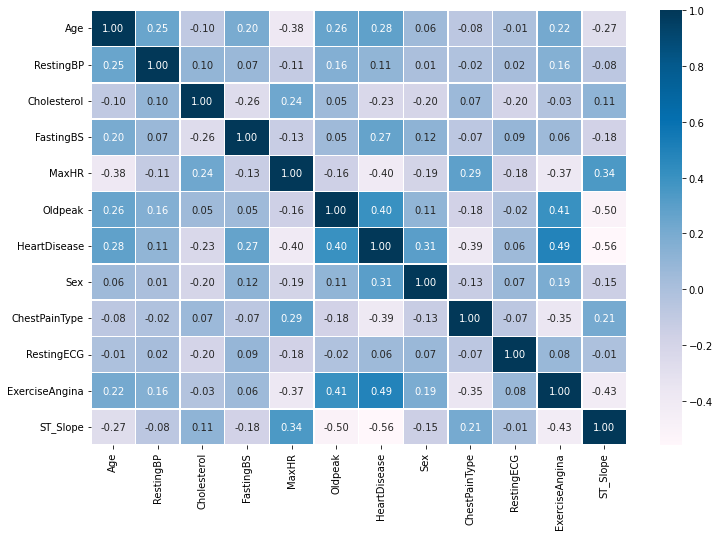

In [ ]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(data_encoded.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [ ]:
# Standardization of Data

In [ ]:
def Standardization(df):
  categorical_features = df[['HeartDisease','Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']]
  non_categorical_features = df.drop(['HeartDisease','Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1)
  scaler = preprocessing.StandardScaler().fit(non_categorical_features)

  non_categorical_features = pd.DataFrame(scaler.fit_transform(non_categorical_features),columns=non_categorical_features.columns,index=non_categorical_features.index)

  df = pd.concat([non_categorical_features,categorical_features], axis=1, join="inner")

  return df

data_scaled = Standardization(data_encoded)
data_scaled

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,1.0,1.0,1.0,0.0,2.0
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,0.0,2.0,1.0,0.0,1.0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,1.0,1.0,2.0,0.0,2.0
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,0.0,0.0,1.0,1.0,1.0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,1.0,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,1,1.0,3.0,1.0,0.0,1.0
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,1,1.0,0.0,1.0,0.0,1.0
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,1,1.0,0.0,1.0,1.0,1.0
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1,0.0,1.0,0.0,0.0,1.0


In [ ]:
# Separating the target variable and features

In [ ]:
x = data_scaled.drop(['HeartDisease'],axis =1)
y = data_scaled[['HeartDisease']]
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
913,1
914,1
915,1
916,1


In [ ]:
# spliting the input data and target variable

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3 , stratify=y,random_state=0)

In [ ]:
model = ['DecisionTreeClassifier','MLPClassifier','XGBClassifier','LGBMClassifier','RandomForestClassifier','AdaBoostClassifier','KNeighborsClassifier','SVC','KNeighborsClassifier','GaussianNB','LogisticRegression']
score = []

### Applying the different types of model

# (1)DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
score.append(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.7862318840579711


# (2)MLPClassifier

In [ ]:
clf =   MLPClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
score.append(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.8659420289855072


# (3)XGBClassifier

In [ ]:
from xgboost import XGBClassifier
clf =   XGBClassifier(n_estimators=50)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
score.append(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


0.8623188405797102


# (4)LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier
clf =   LGBMClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
score.append(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


0.8405797101449275


# (5)RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2 =   RandomForestClassifier(n_estimators = 1000, criterion = 'entropy')
clf2.fit(x_train,y_train)
y_pred = clf2.predict(x_test)
score.append(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.8804347826086957


# (6)AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf =   AdaBoostClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
score.append(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


0.8478260869565217


# (7)KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(x_train, y_train)
score.append(knn.score(x_test, y_test))
knn.score(x_test, y_test)

0.8260869565217391

# (8)SVC

In [ ]:
from sklearn.svm import SVC

np.random.seed(42)

svc = SVC(kernel = 'poly',random_state=100)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
score.append(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.8478260869565217


# (9) KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
score.append(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.8260869565217391


# (10) GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
score.append(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.822463768115942


# (11)  LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
score.append(accuracy_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

0.855072463768116


# visualization of accuracies of different machine learning models

<BarContainer object of 11 artists>

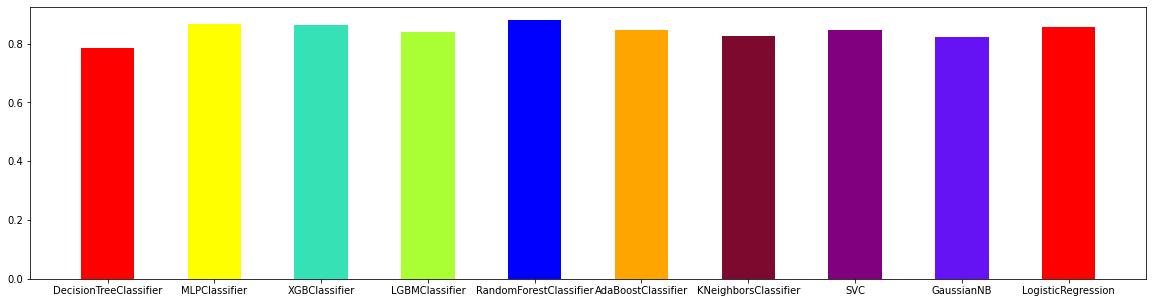

In [ ]:
fig = plt.figure(figsize = (20,5))
import matplotlib.pyplot as plt
 
c = ['red', 'yellow', '#36E1B6','#A9FF33', 'blue', 'orange','green','purple','#7E092E','#6513F4']
plt.bar(model,score,width = 0.5,color =c)

# We get the best accuracy for the given following models so we will hyper tune the following 5 models using GridSearchCV:-
# 1)RandomForestClassifier
# 2) MLP
# 3) XGBClassifier
# 4) LogisticRegression
# 5) SVM

#Machine learning pipeline

In [ ]:
randomForest_pipeline = Pipeline([('RandomForestClassifier model', RandomForestClassifier())])
MLP_pipeline = Pipeline([('mlp neural network model', MLPClassifier(activation= 'relu', solver= 'adam'))])
XGBC_pipeline = Pipeline([('XGBC classifier model', XGBClassifier())])
SVC_pipeline = Pipeline([('SVM model', SVC())])

In [ ]:
def run_pipeline(pipeline, x_train, y_train, x_test,y_test):
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('confusion matrices: ')
    print(multilabel_confusion_matrix(y_test, y_pred))
    print('classification_report: ')
    print(classification_report(y_test, y_pred))

# RandomForestClassifier_Pipeline

In [ ]:
print("======================RandomForestClassifier_Pipeline=======================\n")
run_pipeline(randomForest_pipeline,x_train, y_train,x_test,y_test)

======================RandomForestClassifier_Pipeline=======================

accuracy:  0.8695652173913043
confusion matrices: 
[[[132  21]
  [ 15 108]]

 [[108  15]
  [ 21 132]]]
classification_report: 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       123
           1       0.90      0.86      0.88       153

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



# MLP_pipeline

In [ ]:
print("======================MLP_pipeline=======================\n")
run_pipeline(MLP_pipeline,x_train, y_train,x_test,y_test)

======================MLP_pipeline=======================

accuracy:  0.8731884057971014
confusion matrices: 
[[[133  20]
  [ 15 108]]

 [[108  15]
  [ 20 133]]]
classification_report: 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       123
           1       0.90      0.87      0.88       153

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



# XGBC_pipeline

In [ ]:
print("======================XGBC_pipeline=======================\n")
run_pipeline(XGBC_pipeline,x_train, y_train,x_test,y_test)

======================XGBC_pipeline=======================

accuracy:  0.8623188405797102
confusion matrices: 
[[[132  21]
  [ 17 106]]

 [[106  17]
  [ 21 132]]]
classification_report: 
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       123
           1       0.89      0.86      0.87       153

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



# Support_Vector_Machine_Pipeline

In [ ]:
print("======================Support_Vector_Machine_Pipeline=======================\n")
run_pipeline(SVC_pipeline,x_train, y_train,x_test,y_test)

======================Support_Vector_Machine_Pipeline=======================

accuracy:  0.8659420289855072
confusion matrices: 
[[[132  21]
  [ 16 107]]

 [[107  16]
  [ 21 132]]]
classification_report: 
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       123
           1       0.89      0.86      0.88       153

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276



#HyperTuning of RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=33)
parameters = {
    "n_estimators":[5,10,50,100,250,300,350,400,500,600,],
    "max_depth":[2,4,8,16,32,64,None],}
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=33),
             param_grid={'max_depth': [2, 4, 8, 16, 32, 64, None],
                         'n_estimators': [5, 10, 50, 100, 250, 300, 350, 400,
                                          500, 600]})

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

display(cv)

Best parameters are: {'max_depth': 8, 'n_estimators': 250}


0.799 + or -0.017 for the {'max_depth': 2, 'n_estimators': 5}
0.844 + or -0.023 for the {'max_depth': 2, 'n_estimators': 10}
0.852 + or -0.013 for the {'max_depth': 2, 'n_estimators': 50}
0.846 + or -0.006 for the {'max_depth': 2, 'n_estimators': 100}
0.854 + or -0.008 for the {'max_depth': 2, 'n_estimators': 250}
0.854 + or -0.013 for the {'max_depth': 2, 'n_estimators': 300}
0.85 + or -0.013 for the {'max_depth': 2, 'n_estimators': 350}
0.849 + or -0.012 for the {'max_depth': 2, 'n_estimators': 400}
0.85 + or -0.01 for the {'max_depth': 2, 'n_estimators': 500}
0.852 + or -0.014 for the {'max_depth': 2, 'n_estimators': 600}
0.829 + or -0.022 for the {'max_depth': 4, 'n_estimators': 5}
0.84 + or -0.021 for the {'max_depth': 4, 'n_estimators': 10}
0.857 + or -0.021 for the {'max_depth': 4, 'n_estimators': 50}
0.86 + or -0.021 for the {'max_depth': 4, 'n_estimators': 100}
0.857 + or -0.01 for the {'max_depth': 4, 'n_estimators'

# Plot betweem n_estimator v/s Accuracy

[0.8659420289855072, 0.8586956521739131, 0.8840579710144928, 0.8659420289855072, 0.8659420289855072, 0.8731884057971014, 0.8768115942028986, 0.8659420289855072, 0.8659420289855072, 0.8659420289855072, 0.8659420289855072]


Text(0, 0.5, 'acc_score')

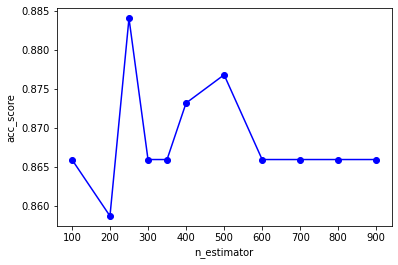

In [ ]:
hyper_score1 = []
n_estimator = [100,200,250,300,350,400,500,600,700,800,900]
for i in range(len(n_estimator)):
  clf =   RandomForestClassifier(n_estimators = n_estimator[i])
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  hyper_score1.append(accuracy_score(y_test,y_pred))
print(hyper_score1)
plt.plot(n_estimator,hyper_score1,color='b',marker='o')
plt.xlabel('n_estimator')
plt.ylabel('acc_score')

# Plot betweem max_depth v/s Accuracy

[0.8695652173913043, 0.8695652173913043, 0.8731884057971014, 0.8695652173913043, 0.8659420289855072, 0.8659420289855072, 0.8623188405797102, 0.8659420289855072, 0.8840579710144928, 0.8659420289855072, 0.8768115942028986, 0.8659420289855072, 0.8623188405797102, 0.8695652173913043, 0.8659420289855072, 0.8695652173913043]


Text(0, 0.5, 'acc_score')

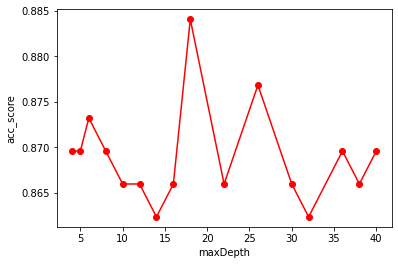

In [ ]:
hyper_score2 = []
maxDepth = [4,5,6,8,10,12,14,16,18,22,26,30,32,36,38,40]
for i in range(len(maxDepth)):
  clf =   RandomForestClassifier(max_depth = maxDepth[i])
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  hyper_score2.append(accuracy_score(y_test,y_pred))
print(hyper_score2)
plt.plot(maxDepth,hyper_score2,color='r',marker='o')
plt.xlabel('maxDepth')
plt.ylabel('acc_score')

# Plot betweem min_samples_leaf v/s Accuracy

[0.8695652173913043, 0.8659420289855072, 0.8731884057971014, 0.8695652173913043, 0.8623188405797102, 0.8731884057971014, 0.8659420289855072, 0.8695652173913043, 0.8586956521739131, 0.8623188405797102, 0.8586956521739131, 0.8623188405797102, 0.8695652173913043, 0.8731884057971014, 0.8514492753623188, 0.8514492753623188]


Text(0, 0.5, 'acc_score')

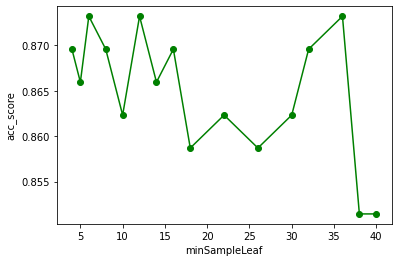

In [ ]:
hyper_score3 = []
minSampleLeaf = [4,5,6,8,10,12,14,16,18,22,26,30,32,36,38,40]
for i in range(len(minSampleLeaf)):
  clf =   RandomForestClassifier(min_samples_leaf = minSampleLeaf[i])
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  hyper_score3.append(accuracy_score(y_test,y_pred))
print(hyper_score3)
plt.plot(minSampleLeaf,hyper_score3,color='g',marker='o')
plt.xlabel('minSampleLeaf')
plt.ylabel('acc_score')

# Plot betweem max_features v/s Accuracy

[0.8514492753623188, 0.8804347826086957, 0.8623188405797102]


Text(0, 0.5, 'acc_score')

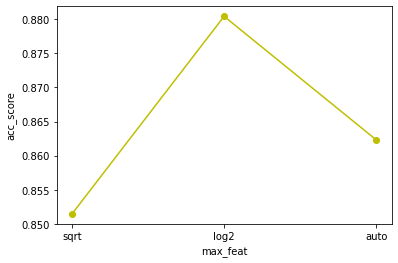

In [ ]:
hyper_score4 = []
max_feat = ['sqrt','log2','auto']
for i in range(len(max_feat)):
  clf =   RandomForestClassifier(max_features = max_feat[i])
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  hyper_score4.append(accuracy_score(y_test,y_pred))
print(hyper_score4)
plt.plot(max_feat,hyper_score4,color='y',marker='o')
plt.xlabel('max_feat')
plt.ylabel('acc_score')

# Accuracy after hypertunning the parameters of randomForestClassifier

In [ ]:
classifier = RandomForestClassifier(n_estimators=250,max_depth=18,max_features='log2',min_samples_leaf=6)
new_randomForest_pipeline = Pipeline([('RandomForestClassifiers model', classifier)])
run_pipeline(new_randomForest_pipeline,x_train, y_train,x_test,y_test)

accuracy:  0.8804347826086957
confusion matrices: 
[[[132  21]
  [ 12 111]]

 [[111  12]
  [ 21 132]]]
classification_report: 
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       123
           1       0.92      0.86      0.89       153

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



#HyperTuning of MLPClassifier

In [ ]:
rfc = MLPClassifier()
parameters = {
    "activation":['identity', 'logistic', 'tanh', 'relu'],
    "solver":['lbfgs', 'sgd', 'adam'],}
cv_mlp = GridSearchCV(rfc,parameters,cv=5)
cv_mlp.fit(x_train,y_train.values.ravel())
display(cv_mlp)

Best parameters are: {'activation': 'relu', 'solver': 'adam'}


0.841 + or -0.021 for the {'activation': 'identity', 'solver': 'lbfgs'}
0.849 + or -0.027 for the {'activation': 'identity', 'solver': 'sgd'}
0.841 + or -0.034 for the {'activation': 'identity', 'solver': 'adam'}
0.79 + or -0.023 for the {'activation': 'logistic', 'solver': 'lbfgs'}
0.788 + or -0.013 for the {'activation': 'logistic', 'solver': 'sgd'}
0.847 + or -0.029 for the {'activation': 'logistic', 'solver': 'adam'}
0.787 + or -0.027 for the {'activation': 'tanh', 'solver': 'lbfgs'}
0.843 + or -0.019 for the {'activation': 'tanh', 'solver': 'sgd'}
0.849 + or -0.022 for the {'activation': 'tanh', 'solver': 'adam'}
0.78 + or -0.029 for the {'activation': 'relu', 'solver': 'lbfgs'}
0.847 + or -0.02 for the {'activation': 'relu', 'solver': 'sgd'}
0.852 + or -0.025 for the {'activation': 'relu', 'solver': 'adam'}


# Plot betweem hidden layer v/s Accuracy

[0.8478260869565217, 0.855072463768116, 0.855072463768116, 0.855072463768116, 0.8514492753623188, 0.8659420289855072, 0.8623188405797102, 0.8623188405797102, 0.8586956521739131, 0.8623188405797102, 0.855072463768116]


Text(0, 0.5, 'acc_score')

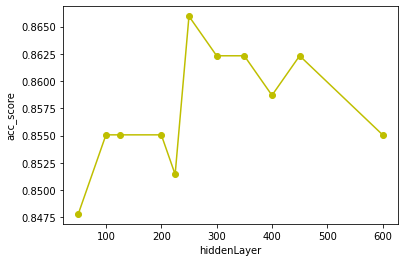

In [ ]:
hyper_score_mlp1 = []
hiddenLayer = [50,100,125,200,225,250,300,350,400,450,600]
for i in range(len(hiddenLayer)):
  clf =   MLPClassifier(hidden_layer_sizes = hiddenLayer[i],activation= 'relu', solver='adam')
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  hyper_score_mlp1.append(accuracy_score(y_test,y_pred))
print(hyper_score_mlp1)
plt.plot(hiddenLayer,hyper_score_mlp1,color='y',marker='o')
plt.xlabel('hiddenLayer')
plt.ylabel('acc_score')

# Plot betweem max_iteration v/s Accuracy

[0.8478260869565217, 0.8442028985507246, 0.8478260869565217, 0.8586956521739131, 0.8659420289855072, 0.855072463768116, 0.855072463768116, 0.8442028985507246, 0.855072463768116, 0.855072463768116]


Text(0, 0.5, 'acc_score')

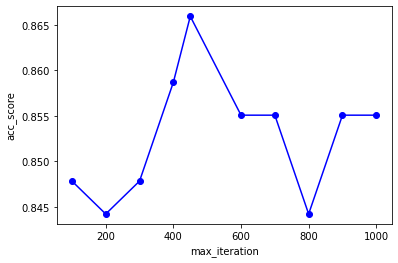

In [ ]:
hyper_score_mlp2 = []
max_iteration = [100,200,300,400,450,600,700,800,900,1000]
for i in range(len(max_iteration)):
  clf =   MLPClassifier(max_iter = max_iteration[i])
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  hyper_score_mlp2.append(accuracy_score(y_test,y_pred))
print(hyper_score_mlp2)
plt.plot(max_iteration,hyper_score_mlp2,color='b',marker='o')
plt.xlabel('max_iteration')
plt.ylabel('acc_score')

# Plot betweem learning_rate v/s Accuracy

[0.8514492753623188, 0.8442028985507246, 0.8586956521739131, 0.8405797101449275, 0.8478260869565217, 0.8297101449275363, 0.8405797101449275, 0.8586956521739131, 0.8333333333333334, 0.8405797101449275, 0.8586956521739131]


Text(0, 0.5, 'acc_score')

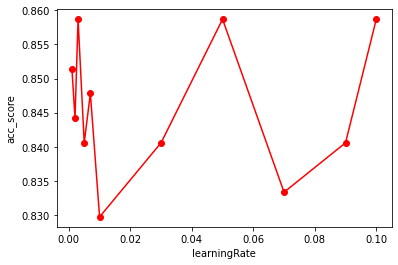

In [ ]:
hyper_score_mlp3 = []
learningRate = [0.001,0.002,0.003,0.005,0.007,0.010,0.03,0.05,0.07,0.09,0.1]
for i in range(len(learningRate)):
  clf =   MLPClassifier(learning_rate_init = learningRate[i])
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  hyper_score_mlp3.append(accuracy_score(y_test,y_pred))
print(hyper_score_mlp3)
plt.plot(learningRate,hyper_score_mlp3,color='r',marker='o')
plt.xlabel('learningRate')
plt.ylabel('acc_score')

# Accuracy after hypertuning the parameters of MLPClassifier

In [ ]:
mlp_classifier = MLPClassifier(activation= 'relu', solver='adam',hidden_layer_sizes=250,max_iter=450)
new_MLP_pipeline = Pipeline([('MLPClassifier model', mlp_classifier)])
run_pipeline(new_MLP_pipeline,x_train, y_train,x_test,y_test)

accuracy:  0.8731884057971014
confusion matrices: 
[[[129  24]
  [ 11 112]]

 [[112  11]
  [ 24 129]]]
classification_report: 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       123
           1       0.92      0.84      0.88       153

    accuracy                           0.87       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.87      0.87       276



#HyperTuning of XGBClassiifier

In [ ]:
xgbc = XGBClassifier()
parameters = {
    "eta":[0.01,0.02,0.03,0.05,0.07,0.09,0.1],
    "min_child_weight":[1,2,4,6,8,9,12],}
cv_xgbc = GridSearchCV(xgbc,parameters,cv=5)
cv_xgbc.fit(x_train,y_train.values.ravel())
display(cv_xgbc)

Best parameters are: {'eta': 0.01, 'min_child_weight': 4}


0.858 + or -0.017 for the {'eta': 0.01, 'min_child_weight': 1}
0.866 + or -0.018 for the {'eta': 0.01, 'min_child_weight': 2}
0.869 + or -0.027 for the {'eta': 0.01, 'min_child_weight': 4}
0.861 + or -0.025 for the {'eta': 0.01, 'min_child_weight': 6}
0.858 + or -0.025 for the {'eta': 0.01, 'min_child_weight': 8}
0.86 + or -0.028 for the {'eta': 0.01, 'min_child_weight': 9}
0.855 + or -0.022 for the {'eta': 0.01, 'min_child_weight': 12}
0.858 + or -0.017 for the {'eta': 0.02, 'min_child_weight': 1}
0.866 + or -0.018 for the {'eta': 0.02, 'min_child_weight': 2}
0.869 + or -0.027 for the {'eta': 0.02, 'min_child_weight': 4}
0.861 + or -0.025 for the {'eta': 0.02, 'min_child_weight': 6}
0.858 + or -0.025 for the {'eta': 0.02, 'min_child_weight': 8}
0.86 + or -0.028 for the {'eta': 0.02, 'min_child_weight': 9}
0.855 + or -0.022 for the {'eta': 0.02, 'min_child_weight': 12}
0.858 + or -0.017 for the {'eta': 0.03, 'min_child_weight'

# Plot betweem learning_rate v/s Accuracy

[0.855072463768116, 0.8623188405797102, 0.8695652173913043, 0.8514492753623188, 0.855072463768116]


Text(0, 0.5, 'acc_score')

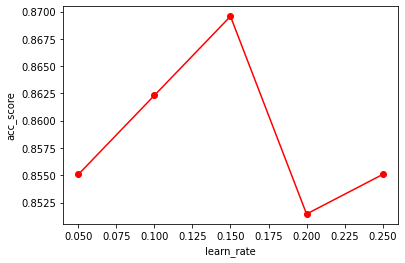

In [ ]:
hyper_score_xgbc1 = []
learn_rate = [0.05, 0.1, 0.15, 0.2, 0.25]
for i in range(len(learn_rate)):
  clf =   XGBClassifier(learning_rate = learn_rate[i])
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  hyper_score_xgbc1.append(accuracy_score(y_test,y_pred))
print(hyper_score_xgbc1)
plt.plot(learn_rate,hyper_score_xgbc1,color='r',marker='o')
plt.xlabel('learn_rate')
plt.ylabel('acc_score')

# Plot betweem n_estimator v/s Accuracy

[0.8623188405797102, 0.8623188405797102, 0.8405797101449275, 0.8514492753623188, 0.855072463768116, 0.8442028985507246, 0.8369565217391305, 0.8333333333333334, 0.8260869565217391]


Text(0, 0.5, 'acc_score')

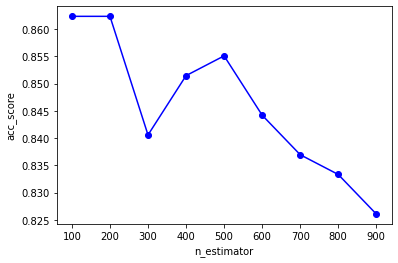

In [ ]:
hyper_score_xgbc2 = []
n_estimator = [100,200,300,400,500,600,700,800,900]
for i in range(len(n_estimator)):
  clf =   XGBClassifier(n_estimators= n_estimator[i])
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  hyper_score_xgbc2.append(accuracy_score(y_test,y_pred))
print(hyper_score_xgbc2)
plt.plot(n_estimator,hyper_score_xgbc2,color='b',marker='o')
plt.xlabel('n_estimator')
plt.ylabel('acc_score')

# Plot betwenn max_depth v/v Accuracy

[0.8840579710144928, 0.8659420289855072, 0.8659420289855072, 0.8659420289855072, 0.8586956521739131, 0.8586956521739131]


Text(0, 0.5, 'acc_score')

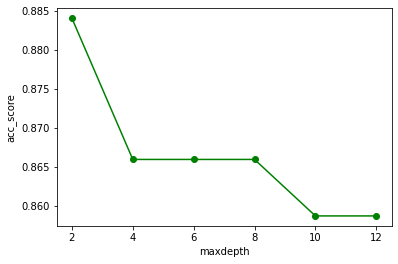

In [ ]:
hyper_score_xgbc3 = []
maxdepth = [2,4,6,8,10,12]
for i in range(len(maxdepth)):
  clf =   XGBClassifier(n_estimators=100,eta= 0.01, min_child_weight = 4,colsample_bytree =0.3,max_depth= maxdepth[i])
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  hyper_score_xgbc3.append(accuracy_score(y_test,y_pred))
print(hyper_score_xgbc3)
plt.plot(maxdepth,hyper_score_xgbc3,color='g',marker='o')
plt.xlabel('maxdepth')
plt.ylabel('acc_score')

# Plot betwenn cosamp_bytree v/v Accuracy

[0.8804347826086957, 0.8840579710144928, 0.8659420289855072, 0.8659420289855072, 0.8586956521739131, 0.855072463768116]


Text(0, 0.5, 'acc_score')

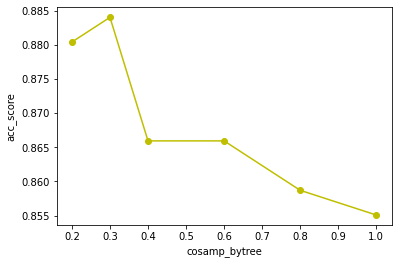

In [ ]:
hyper_score_xgbc4 = []
cosamp_bytree = [0.2,0.3,0.4,0.6,0.8,1]
for i in range(len(cosamp_bytree)):
  clf =   XGBClassifier(n_estimators=100,eta= 0.01, min_child_weight = 4,max_depth=2,colsample_bytree= cosamp_bytree[i],learning_rate=0.15)
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  hyper_score_xgbc4.append(accuracy_score(y_test,y_pred))
print(hyper_score_xgbc4)
plt.plot(cosamp_bytree,hyper_score_xgbc4,color='y',marker='o')
plt.xlabel('cosamp_bytree')
plt.ylabel('acc_score')

#Accuracy after hypertuning the parameters of XGBClassifier

In [ ]:
xgbc_classifier = XGBClassifier(n_estimators=100,eta= 0.01, min_child_weight = 4,max_depth=2,colsample_bytree =0.3,learning_rate=0.15)
new_XGBC_pipeline = Pipeline([('XGBClassifierS model', xgbc_classifier)])
run_pipeline(new_XGBC_pipeline,x_train, y_train,x_test,y_test)

accuracy:  0.8840579710144928
confusion matrices: 
[[[132  21]
  [ 11 112]]

 [[112  11]
  [ 21 132]]]
classification_report: 
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       123
           1       0.92      0.86      0.89       153

    accuracy                           0.88       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.88      0.88       276



#HyperTuning of LogisticRegression

newton-cg
lbfgs
liblinear
sag
saga
[0.855072463768116, 0.855072463768116, 0.855072463768116, 0.855072463768116, 0.855072463768116]


Text(0, 0.5, 'acc_score')

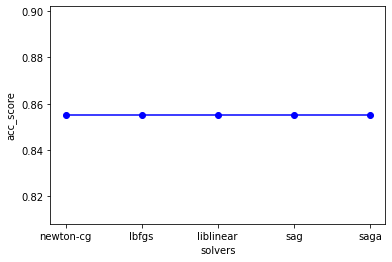

In [ ]:
hyper_score_lr2 = []
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
for i in range(len(solvers)):
  print(solvers[i])
  clf1 =   LogisticRegression(solver= solvers[i],penalty='l2',C=10)
  clf1.fit(x_train,y_train)
  y_pred = clf1.predict(x_test)
  hyper_score_lr2.append(accuracy_score(y_test,y_pred))
print(hyper_score_lr2)
plt.plot(solvers,hyper_score_lr2,color='b',marker='o')
plt.xlabel('solvers')
plt.ylabel('acc_score')

[0.855072463768116, 0.855072463768116, 0.855072463768116, 0.855072463768116, 0.855072463768116, 0.855072463768116, 0.855072463768116, 0.855072463768116, 0.855072463768116]


Text(0, 0.5, 'acc_score')

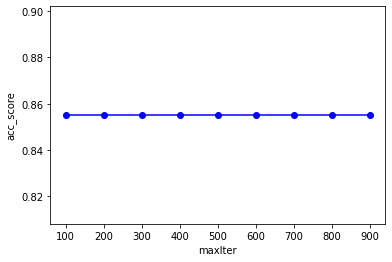

In [ ]:
hyper_score_lr1 = []
maxIter = [100,200,300,400,500,600,700,800,900]
for i in range(len(maxIter)):
  reg =   LogisticRegression(max_iter= maxIter[i],multi_class='multinomial')
  reg.fit(x_train,y_train)
  y_pred = reg.predict(x_test)
  hyper_score_lr1.append(accuracy_score(y_test,y_pred))
print(hyper_score_lr1)
plt.plot(maxIter,hyper_score_lr1,color='b',marker='o')
plt.xlabel('maxIter')
plt.ylabel('acc_score')

#HyperTuning of Support Vector Machine(SVM)

In [ ]:
svm = SVC()
parameters = {
    "decision_function_shape":['ovo','ovr'],
    "class_weight":['balanced','dict'],"C":[1,2,3,4,5,6],'kernel':['rbf','linear','poly']}
cv_svm = GridSearchCV(svm,parameters,cv=5)
cv_svm.fit(x_train,y_train.values.ravel())
display(cv_svm)

Best parameters are: {'C': 2, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'kernel': 'rbf'}


0.849 + or -0.027 for the {'C': 1, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'kernel': 'rbf'}
0.832 + or -0.025 for the {'C': 1, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'kernel': 'linear'}
0.836 + or -0.025 for the {'C': 1, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'kernel': 'poly'}
0.849 + or -0.027 for the {'C': 1, 'class_weight': 'balanced', 'decision_function_shape': 'ovr', 'kernel': 'rbf'}
0.832 + or -0.025 for the {'C': 1, 'class_weight': 'balanced', 'decision_function_shape': 'ovr', 'kernel': 'linear'}
0.836 + or -0.025 for the {'C': 1, 'class_weight': 'balanced', 'decision_function_shape': 'ovr', 'kernel': 'poly'}
nan + or -nan for the {'C': 1, 'class_weight': 'dict', 'decision_function_shape': 'ovo', 'kernel': 'rbf'}
nan + or -nan for the {'C': 1, 'class_weight': 'dict', 'decision_function_shape': 'ovo', 'k

#plot between kernel and Accuracy

[0.8659420289855072, 0.8514492753623188, 0.8478260869565217]


Text(0, 0.5, 'acc_score')

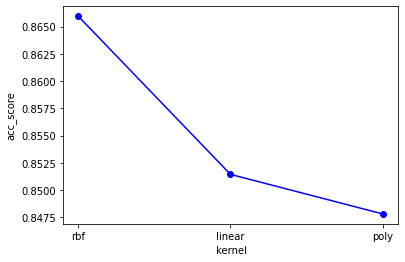

In [ ]:
hyper_score_svm1 = []
kernel= ['rbf','linear','poly']
for i in range(len(kernel)):
  svm = SVC(kernel=kernel[i],shrinking=True)
  svm.fit(x_train,y_train)
  y_pred = svm.predict(x_test)
  hyper_score_svm1.append(accuracy_score(y_test,y_pred))
print(hyper_score_svm1)
plt.plot(kernel,hyper_score_svm1,color='b',marker='o')
plt.xlabel(' kernel')
plt.ylabel('acc_score')

In [ ]:
svm_ = SVC(C=5, class_weight='balanced', decision_function_shape= 'ovo', kernel= 'rbf',random_state =1)
new_svm_pipeline = Pipeline([('svm model', svm_)])
run_pipeline(new_svm_pipeline,x_train, y_train,x_test,y_test)

accuracy:  0.8695652173913043
confusion matrices: 
[[[131  22]
  [ 14 109]]

 [[109  14]
  [ 22 131]]]
classification_report: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       123
           1       0.90      0.86      0.88       153

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276

